In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/umangkejriwal1122/Machine-Learning/master/Data%20Sets/covid_19_clean_complete.csv')


In [3]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0.0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0.0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0.0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0.0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20619 entries, 0 to 20618
Data columns (total 8 columns):
Province/State    6320 non-null object
Country/Region    20619 non-null object
Lat               20619 non-null float64
Long              20619 non-null float64
Date              20619 non-null object
Confirmed         20619 non-null int64
Deaths            20540 non-null float64
Recovered         20619 non-null int64
dtypes: float64(3), int64(2), object(3)
memory usage: 1.3+ MB


In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/umangkejriwal1122/Machine-Learning/master/Data%20Sets/covid_19_clean_complete.csv',parse_dates=['Date'])

In [7]:
df.rename(columns={"Province/State":"State","Country/Region":"country"},inplace=True)

In [16]:
df['active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']

In [17]:
top = df[df['Date'] == df['Date'].max()]

In [18]:
top.head()

,State,country,Lat,Long,Date,Confirmed,Deaths,Recovered,active
20358,NaN,Afghanistan,33.0000,65.0000,2020-04-09,484,15.0,32,437.0
20359,NaN,Albania,41.1533,20.1683,2020-04-09,409,23.0,165,221.0
20360,NaN,Algeria,28.0339,1.6596,2020-04-09,1666,235.0,347,1084.0
20361,NaN,Andorra,42.5063,1.5218,2020-04-09,583,25.0,58,500.0
20362,NaN,Angola,-11.2027,17.8739,2020-04-09,19,2.0,2,15.0


In [21]:
world=top.groupby('country')['Confirmed','Deaths','Recovered','active'].sum().reset_index()

In [22]:
world.head()

,country,Confirmed,Deaths,Recovered,active
0,Afghanistan,484,15.0,32,437.0
1,Albania,409,23.0,165,221.0
2,Algeria,1666,235.0,347,1084.0
3,Andorra,583,25.0,58,500.0
4,Angola,19,2.0,2,15.0


In [24]:
figure=px.choropleth(world,locations='country',locationmode='country name',color='active',hover_name="country",title='Country with active cases',color_continous_scale="Peach",range_color=[1,1000])
figure.show()

TypeError: choropleth() got an unexpected keyword argument 'color_continous_scale'

In [29]:
figure = px.choropleth(world,locations='country',locationmode='country names'
                      ,color="active",hover_name="country",title="Country with active cases"
                      ,color_continuous_scale="blues",range_color=[1,10000])
figure.show()

In [30]:
case=df.groupby('Date')['Date','Confirmed'].sum().reset_index()
case.head()

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


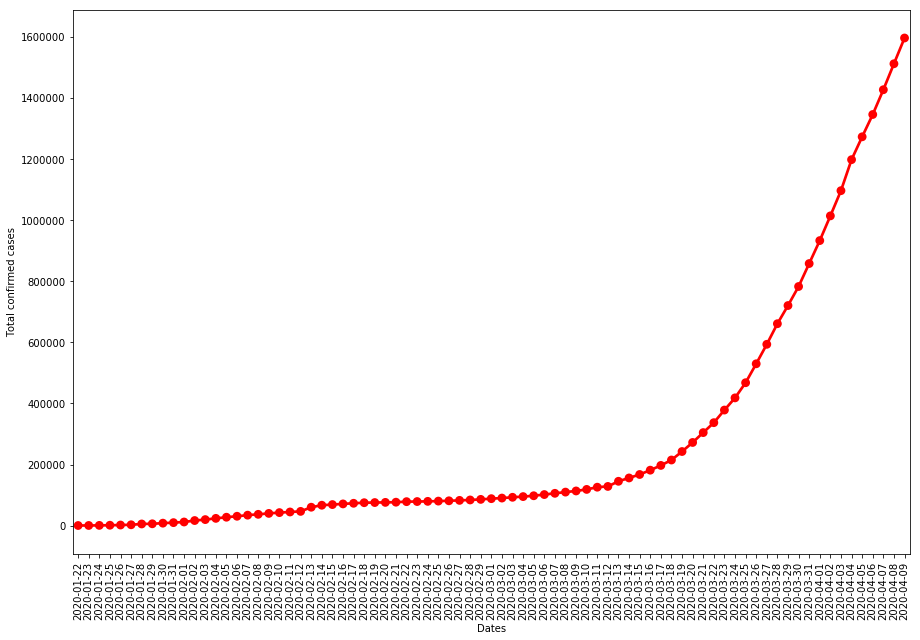

In [44]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90,fontsize=10)
a=sns.pointplot(x=case.Date.dt.date,y=case.Confirmed,color='red')
a.set(xlabel="Dates",ylabel="Total confirmed cases")
plt.show()

In [59]:
topactive=top.groupby('country')['active'].sum().sort_values(ascending=False).reset_index().head(20)

In [60]:
topactive.head(20)

,country,active
0,US,419549.0
1,Italy,96877.0
2,Spain,85610.0
3,France,83140.0
4,Germany,63167.0
5,United Kingdom,57513.0
6,Turkey,39232.0
7,Iran,29801.0
8,Canada,20151.0
9,Netherlands,19220.0


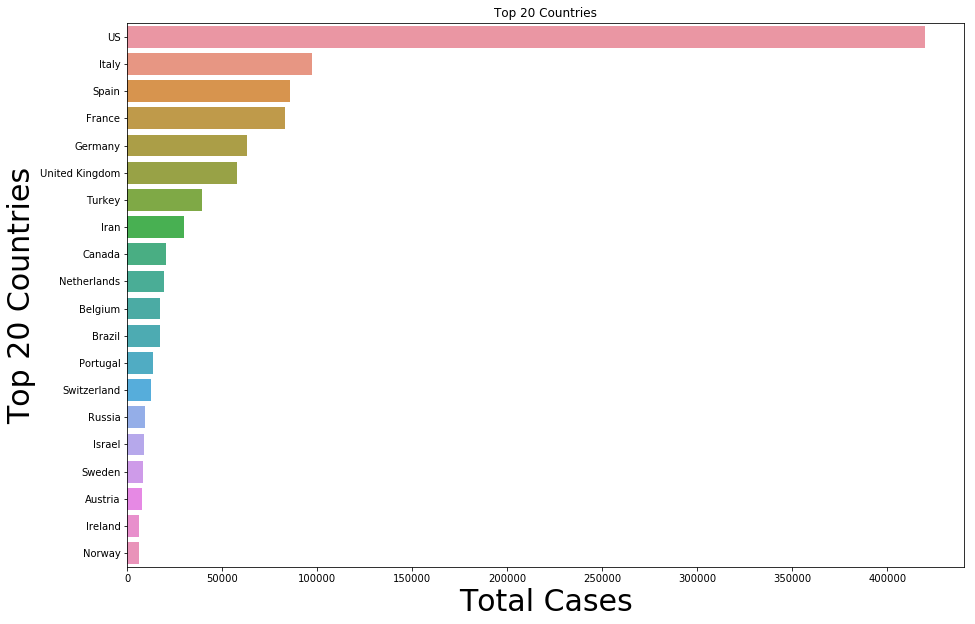

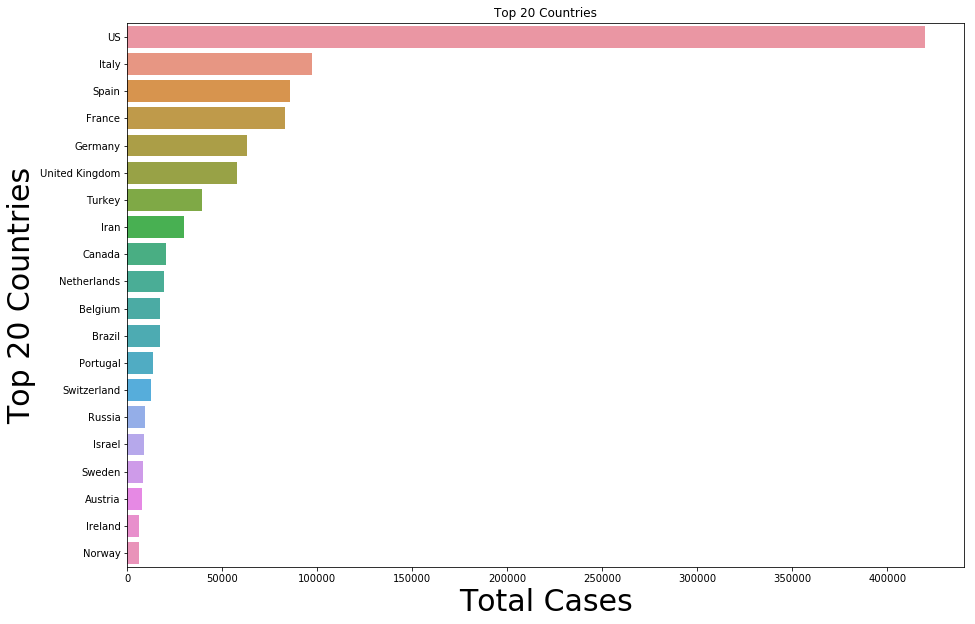

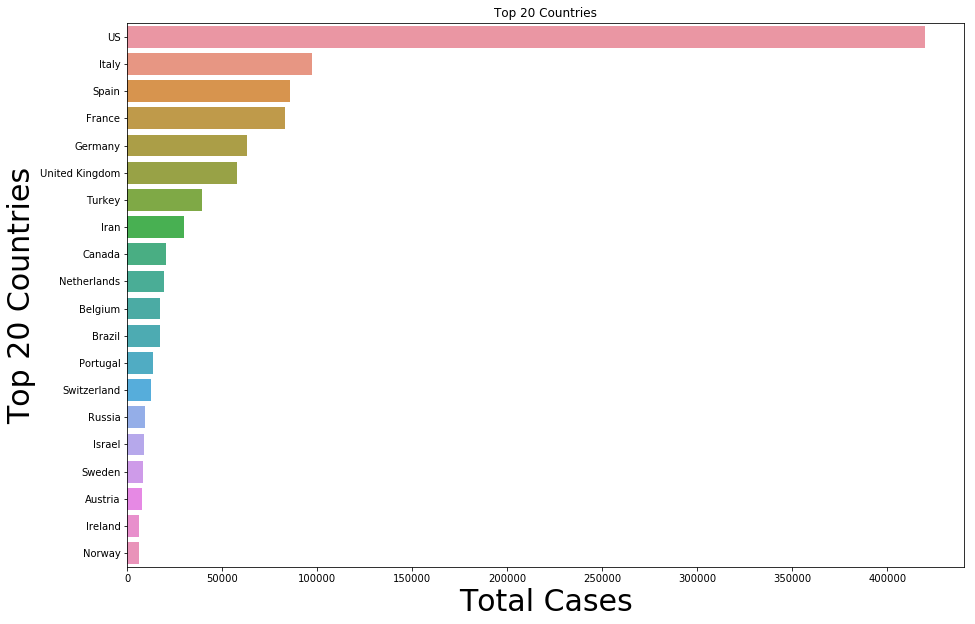

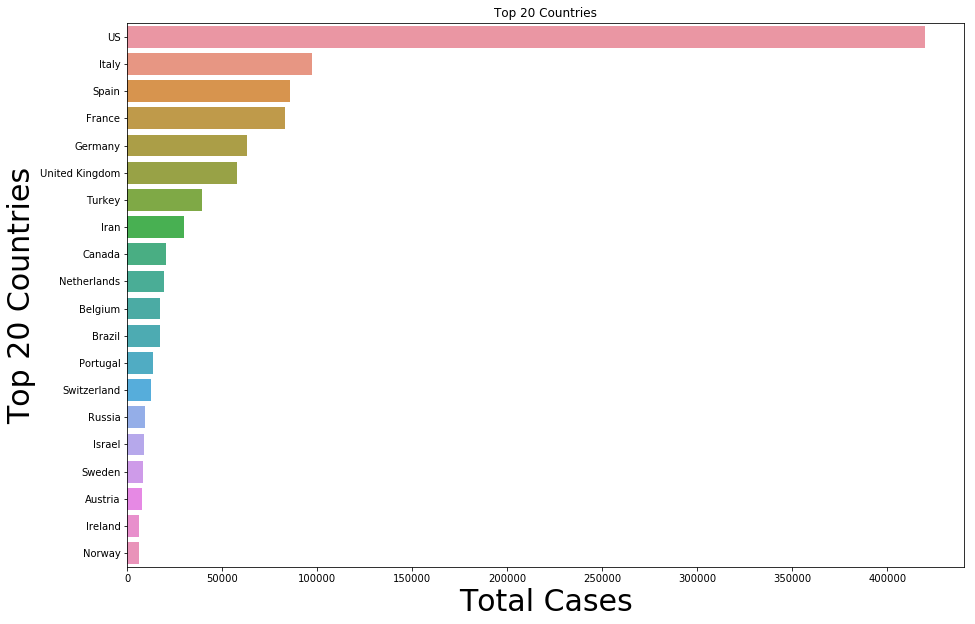

In [68]:
plt.figure(figsize=(15,10))
plt.xlabel("Total Cases",fontsize=30)
plt.ylabel("Confirmed Cases",fontsize=30)
plt.title("Top 20 Countries")
ax = sns.barplot(x=topactive.active,y=topactive.country)
ax.set(xlabel="Total Cases",ylabel ="Top 20 Countries")
plt.show()

In [72]:
china=df[df['country']=='China']
China=china.groupby('Date')['Confirmed','Deaths','Recovered','active'].sum().reset_index()
china.head()

,State,country,Lat,Long,Date,Confirmed,Deaths,Recovered,active
49,Anhui,China,31.8257,117.2264,2020-01-22,1,0.0,0,1.0
50,Beijing,China,40.1824,116.4142,2020-01-22,14,0.0,0,14.0
51,Chongqing,China,30.0572,107.8740,2020-01-22,6,0.0,0,6.0
52,Fujian,China,26.0789,117.9874,2020-01-22,1,0.0,0,1.0
53,Gansu,China,37.8099,101.0583,2020-01-22,0,0.0,0,0.0


In [73]:
us=df[df['country']=='US']
us=us.groupby('Date')['Confirmed','Deaths','Recovered','active'].sum().reset_index()
us.head()

,Date,Confirmed,Deaths,Recovered,active
0,2020-01-22,1,0.0,0,1.0
1,2020-01-23,1,0.0,0,1.0
2,2020-01-24,2,0.0,0,2.0
3,2020-01-25,2,0.0,0,2.0
4,2020-01-26,5,0.0,0,5.0


In [74]:
italy=df[df['country']=='Italy']
italy=italy.groupby('Date')['Confirmed','Deaths','Recovered','active'].sum().reset_index()
italy.head()

,Date,Confirmed,Deaths,Recovered,active
0,2020-01-22,0,0.0,0,0.0
1,2020-01-23,0,0.0,0,0.0
2,2020-01-24,0,0.0,0,0.0
3,2020-01-25,0,0.0,0,0.0
4,2020-01-26,0,0.0,0,0.0


In [75]:
india=df[df['country']=='India']
india=india.groupby('Date')['Confirmed','Deaths','Recovered','active'].sum().reset_index()
india.head()

,Date,Confirmed,Deaths,Recovered,active
0,2020-01-22,0,0.0,0,0.0
1,2020-01-23,0,0.0,0,0.0
2,2020-01-24,0,0.0,0,0.0
3,2020-01-25,0,0.0,0,0.0
4,2020-01-26,0,0.0,0,0.0


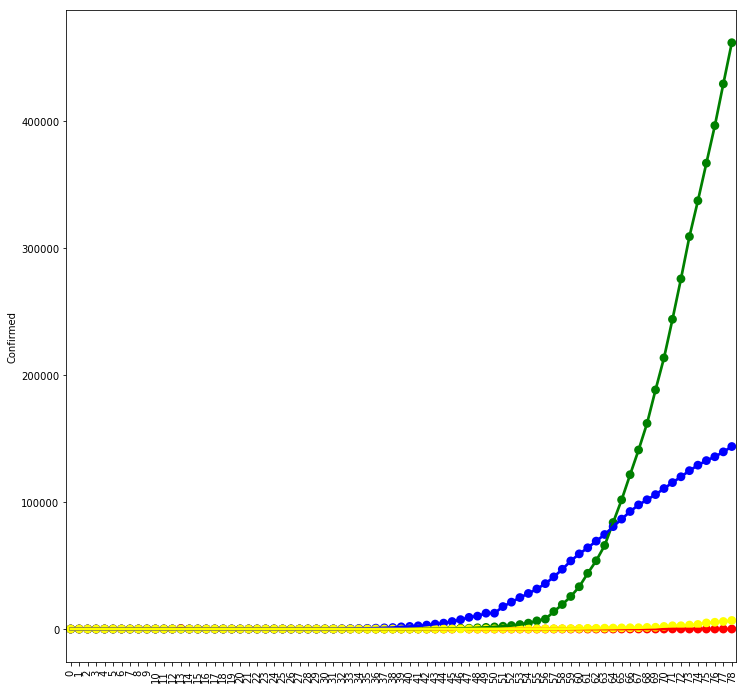

In [79]:
plt.figure(figsize=(12,12))
plt.xticks(rotation=90)
sns.pointplot(china.index,china.Confirmed,color="Red")
sns.pointplot(us.index,us.Confirmed,color="Green")
sns.pointplot(italy.index,italy.Confirmed,color="Blue")
sns.pointplot(india.index,india.Confirmed,color="Yellow")
plt.show()

In [80]:
from fbprophet import Prophet

In [81]:
df.head()

,State,country,Lat,Long,Date,Confirmed,Deaths,Recovered,active
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0.0,0,0.0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0.0,0,0.0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0.0,0,0.0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0.0,0,0.0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0.0,0,0.0


In [83]:
confirm=df.groupby('Date').sum()['Confirmed'].reset_index()
confirm.head()

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [84]:
death=df.groupby('Date').sum()['Deaths'].reset_index()
death.head()

,Date,Deaths
0,2020-01-22,17.0
1,2020-01-23,18.0
2,2020-01-24,26.0
3,2020-01-25,42.0
4,2020-01-26,56.0


In [88]:
confirm.columns=['ds','y']

In [89]:
confirm.head()

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [91]:
m=Prophet(interval_width=0.95,yearly_seasonality=True)
m.fit(confirm)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [92]:
future=m.make_future_dataframe(periods=7)
future.tail()

,ds
81,2020-04-12
82,2020-04-13
83,2020-04-14
84,2020-04-15
85,2020-04-16


In [93]:
forecast=m.predict(future)

In [94]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
81,2020-04-12,1.811776e+06,1.805730e+06,1.818006e+06
82,2020-04-13,1.873504e+06,1.867593e+06,1.879599e+06
83,2020-04-14,1.931328e+06,1.924007e+06,1.938098e+06
84,2020-04-15,1.984126e+06,1.977731e+06,1.991118e+06
85,2020-04-16,2.033154e+06,2.025968e+06,2.040342e+06


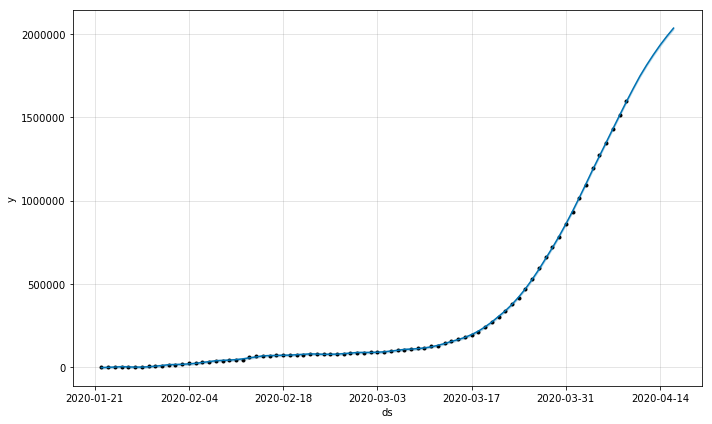

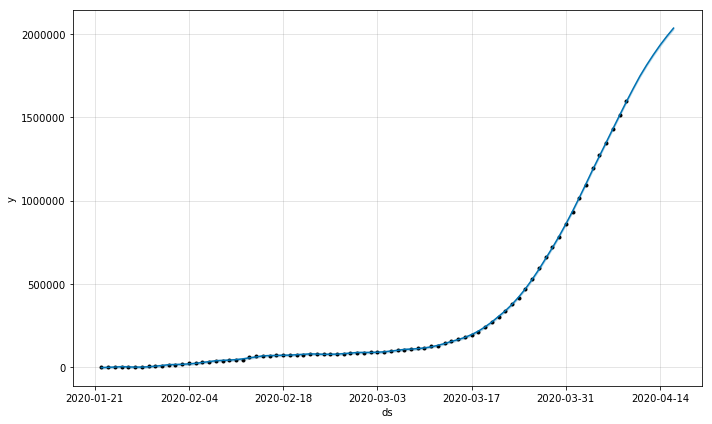

In [100]:
confirmedplot=m.plot(forecast)
plt.show()

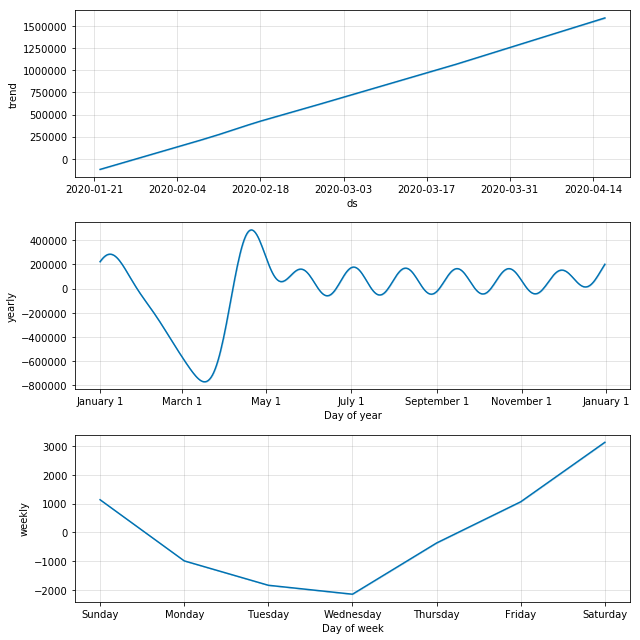

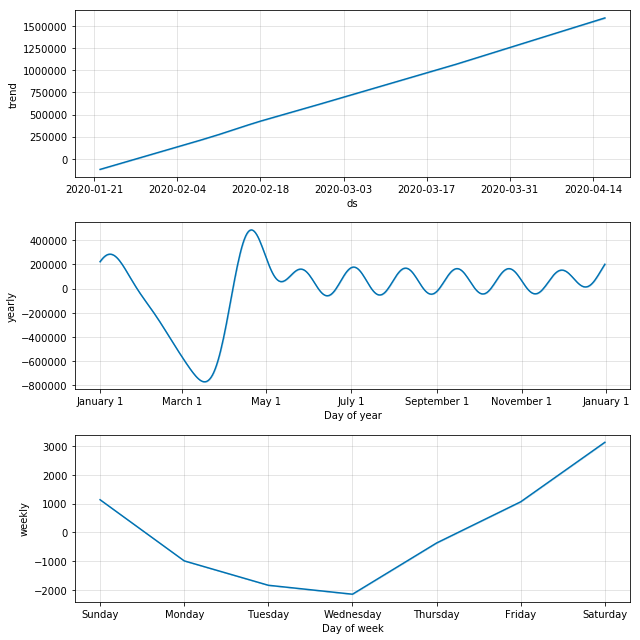

In [102]:
confirmedplotweekly=m.plot_components(forecast)
plt.show()